In [39]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd 
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns 
sns.set()
import matplotlib.pyplot as plt 
# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier


# Library for visualizing our tree
# If you get an error, run 'conda install python-graphviz' in your terminal (without the quotes).
import graphviz 

# Use inline so our visualizations display in notebook
%matplotlib inline

## Main Steps when building a Machine Learning Model. 
1. Inspect and explore data.
2. Select and engineer features.
3. Build and train model.
4. Evaluate model.

# #1 Inspect and explore data.
* Load titanic data
* Visualize all the data using sns.pairplot
* Check for null values

In [40]:
# Load in the titanic data set.
df = pd.read_csv("data/titanic.csv")
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


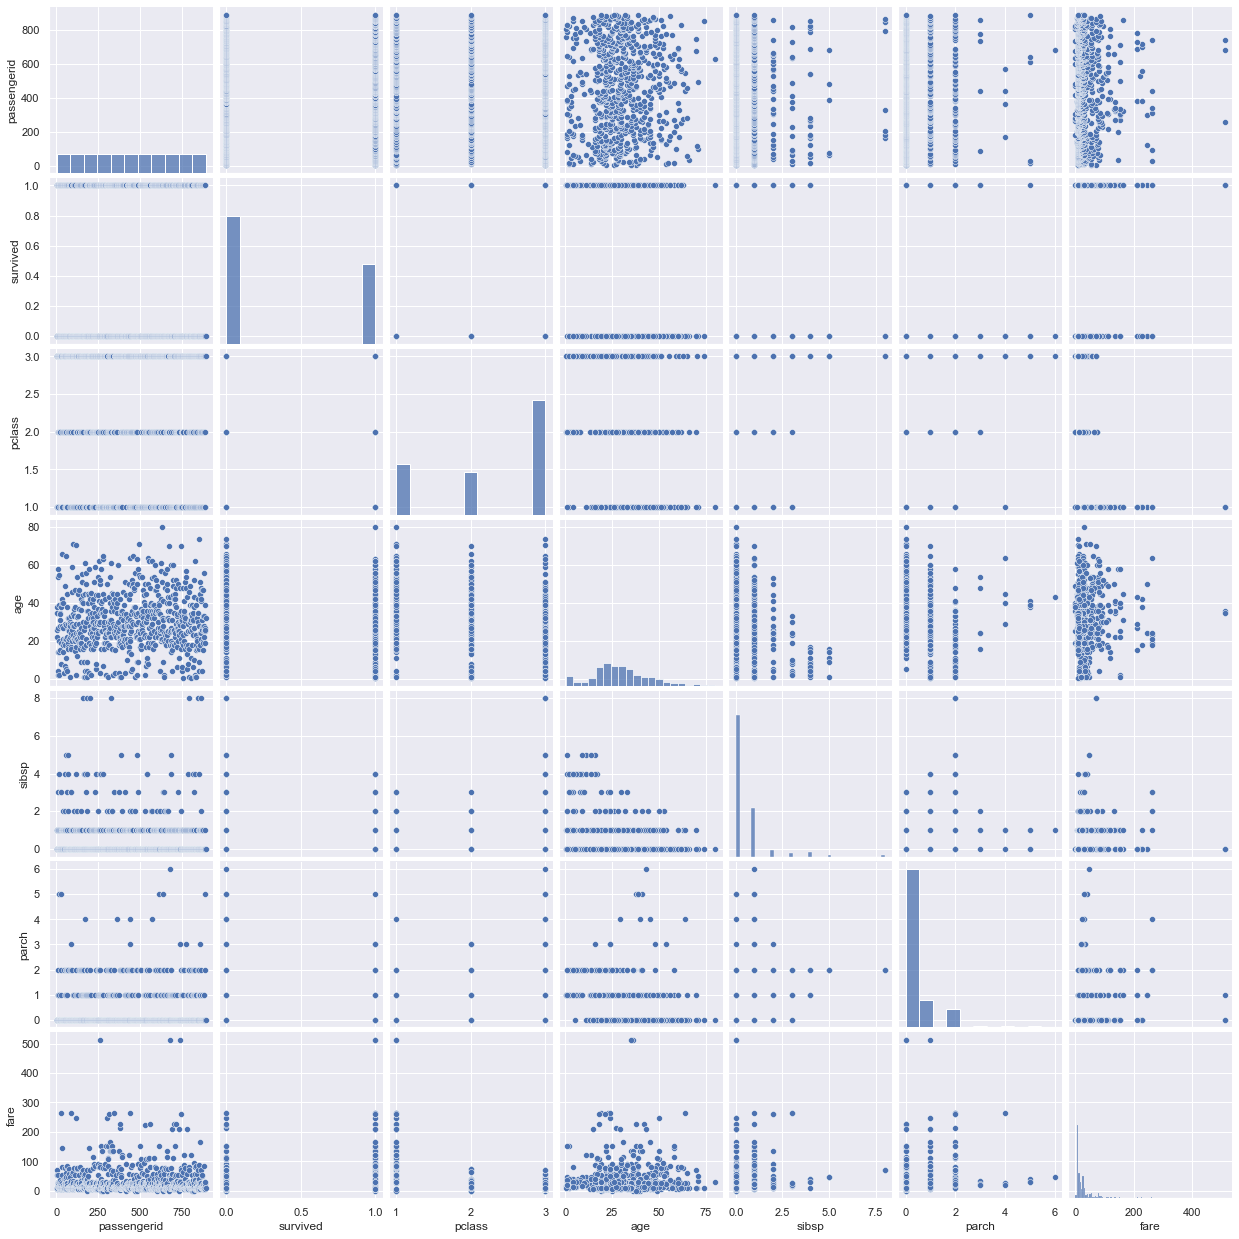

In [41]:
# Visualize all the data using sns.pairplot
sns.pairplot(df)

In [42]:
# Check for null values
df=pd.read_csv("data/titanic.csv")
df.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# #2 Select and engineer features.
1. Fill age null values with -999
1. Convert to numerical values if need be by using `pd.get_dummies()`
1. Create a list of the features you are going to use.  In this case use as many or as little as you would like.
1. Define our `X` and `y`
1. Split our data into trainig and testing sets.

In [43]:
# Fill age null values with -999
df["age"] = df["age"].fillna(-999) # to replace the nulls with -999
df.isnull().sum()

passengerid      0
survived         0
pclass           0
name             0
sex              0
age              0
sibsp            0
parch            0
ticket           0
fare             0
cabin          687
embarked         2
dtype: int64

In [44]:
# 1. Convert to numerical values if need be by using `pd.get_dummies()`
df = pd.get_dummies(df, columns = ["sex","pclass", "embarked"], drop_first = True)
df.head()

,passengerid,survived,name,age,sibsp,parch,ticket,fare,cabin,sex_male,pclass_2,pclass_3,embarked_Q,embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1,0,1


In [45]:
# 2. Create a list of the features we are going to use.
selected_features = ["fare", "age", "sex_male", "pclass_2", "pclass_3",
                     
                     "sibsp","parch","embarked_Q","embarked_S"]


In [46]:
# Define our `X` and `y`
X = df[selected_features] 
y = df['survived']

In [47]:
# Split our data into trainig and testing sets.
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size = 0.2, random_state = 45)
print('Lenght of our Training data:', X_train.shape, '\nLength of our Testing data:', y_test.shape)

Lenght of our Training data: (712, 9) 
Length of our Testing data: (179,)


# #3 Build and train model.
1. For our first pass, initialize our model with `max_depth=2`.
2. Fit our model with our training data. 
3. Make predictions of our testing data. 
4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
    * To calculate auc score you have to get the predicted probabilites for the Survived class using `model.predict_proba(X_test)[:,1]`
5. Visualize our Decision Tree using provided code. 


In [48]:
# For our first pass, initialize our model with `max_depth=2`.
model = DecisionTreeClassifier(max_depth = 2)

In [49]:
# Fit our model with our training data. 
model.fit (X_train,y_train)

DecisionTreeClassifier(max_depth=2)

In [50]:
# Make predictions of our testing data. 
y_pred = model.predict(X_test)

In [51]:
# 4. Evaluate and print our model scores using accuracy, precision, recall, f1 scores, and auc scores. 
accuracy = accuracy_score(y_true = y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true = y_test, y_pred = y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true= y_test, y_pred = y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true= y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities
y_pred_proba = model.predict_proba((X_test))[:,1]
# Keep only the proba for True
#y_pred_proba = y_pred_proba[:,1]

# Compute auc score
auc = roc_auc_score(y_true= y_test, y_score= y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.832402
Precision Score: 0.750000
Recall Score: 0.774194
F1 Score: 0.761905
AUC Score: 0.868004


# OPTIONAL:  Visualize your decision tree. 
* If you get an error, you may need to install the graphviz library.
* Run this command in your terminal to install the graphviz library. 
    * `conda install python-graphviz`
* If that does not work, then try installing the library using pip. 
    * `pip install graphviz`

* If neither of those work, you can just skip this step.

In [52]:
# OPTIONAL 
# Visualize your decision tree. 
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  

# Picking the right parameters...

# Parameter tuning of your Decision Tree using GridSearch

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Visualize your best tree.
1. Which feature was your most important feature?

```python
tree.DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0,
)
```


[Tips on how to customize / set the paramters in the decision tree.](https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use)

In [53]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search.from sklearn.model_selection import GridSearchCV
params = { 
    "criterion": ["gini", "entropy"],
    "splitter" : ["best"],
    "max_depth": [2,5,7,100],
    "min_samples_split": [2,10,20,100],
    "min_samples_leaf": [1,10,20,30]
}

In [54]:
# 1. Initalize your GridSearchCV with a DecisionTreeClassifier, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv =  GridSearchCV( estimator = DecisionTreeClassifier(), 
                              param_grid = params,
                              scoring = "accuracy")

In [55]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 7, 100],
                         'min_samples_leaf': [1, 10, 20, 30],
                         'min_samples_split': [2, 10, 20, 100],
                         'splitter': ['best']},
             scoring='accuracy')

In [56]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print( grid_search_cv.best_params_)
print ("\n")
print( grid_search_cv.best_estimator_)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


DecisionTreeClassifier(max_depth=7, min_samples_split=10)


In [57]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you the best tree
model = grid_search_cv.best_estimator_ #this would fit all the best parameters to the model
# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true= y_test, y_pred= y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true= y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true= y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true= y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]
auc = roc_auc_score(y_true= y_test, y_score= y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.888268
Precision Score: 0.828125
Recall Score: 0.854839
F1 Score: 0.841270
AUC Score: 0.893714


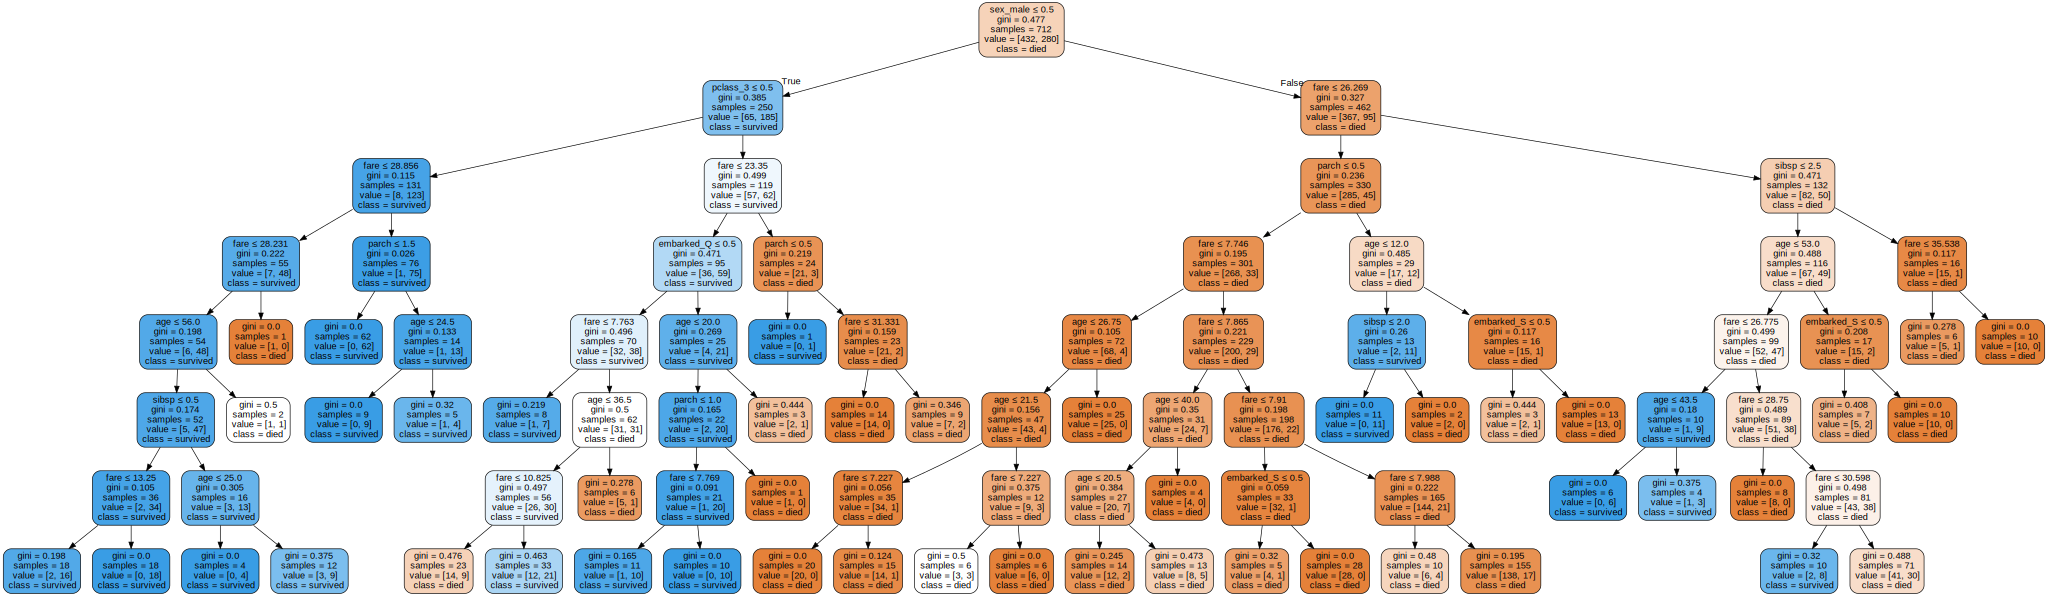

In [58]:
# OPTIONAL!

# 1. Visualize your best tree
dot_data = tree.export_graphviz(model, out_file=None, 
                     feature_names=selected_features,
                     class_names=['died','survived'],
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

In [59]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.DataFrame.from_dict( {'feature_importance': model.feature_importances_,
                                       'feature':selected_features }).sort_values('feature_importance', ascending=False)
feature_imp

,feature_importance,feature
2,0.470549,sex_male
0,0.214512,fare
4,0.110633,pclass_3
1,0.099883,age
6,0.042360,parch
5,0.037652,sibsp
7,0.016522,embarked_Q
8,0.007889,embarked_S
3,0.000000,pclass_2


# Now onto Random Forests...
Were going to do the same with, but this time with a random forest. Remeber... Repetition is the father of learning.

1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
1. Fit your GridSearchCV with your training data. 
1. Print the parameters of your best model. 
1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 
1. Which feature was your most important feature?


# Parameters of the Random Forest Classifier

```python
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
)
```

In [60]:
# 1. Make a dictionary of at least 3 parameters and a list of 3 values for each for your grid search. 
params = {
    "n_estimators": [5,10,50,100],
    "criterion": ["gini", "entropy"],
    "max_depth": [2,7,100],
    "min_samples_split": [2,10,20],
    "max_features": [1,5,"auto"]
}

In [61]:
# 1. Initalize your GridSearchCV with a RandomForestClassifer, your param_grid, and what you are optimizing for.  Choose any of the five optimization strategies; accuracy, precision, recall, f1, or roc_auc.
grid_search_cv = GridSearchCV( estimator=RandomForestClassifier(),
                             param_grid=params,
                             scoring = "accuracy")

In [62]:
# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 7, 100],
                         'max_features': [1, 5, 'auto'],
                         'min_samples_split': [2, 10, 20],
                         'n_estimators': [5, 10, 50, 100]},
             scoring='accuracy')

In [63]:
# 1. Print the parameters of your best model. 
# Print the best parameters it found
print(grid_search_cv.best_params_)

{'criterion': 'entropy', 'max_depth': 100, 'max_features': 1, 'min_samples_split': 20, 'n_estimators': 10}


In [64]:
# 1. Evaluate your best model using accuracy, precision, recall, f1 scores, and auc scores. 

# This command gives you tree that has the highest f1-score. 
model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_true= y_test, y_pred= y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true= y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true= y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = recall_score(y_true= y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true= y_test, y_score= y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.849162
Precision Score: 0.796610
Recall Score: 0.758065
F1 Score: 0.758065
AUC Score: 0.885925


In [65]:
# 1. Which feature was your most important feature?
# Now lets look at our feature importances
feature_imp = pd.Series(model.feature_importances_,index=selected_features).sort_values(ascending=False)
feature_imp

sex_male      0.315988
fare          0.207112
age           0.200473
pclass_3      0.120535
sibsp         0.054006
parch         0.047584
embarked_S    0.021223
pclass_2      0.017236
embarked_Q    0.015843
dtype: float64

# Build a random forest using the ny-vs-sf-housing.csv data. 
* Your target variable, aka the column you are trying to predict, aka your `y` variable is `in_sf`. 
* Can you get an accuracy above 91%?
* What was your most important feature?


In [66]:
df = pd.read_csv('data/ny-vs-sf-houses.csv')
df.head()

,in_sf,beds,bath,price,year_built,sqft,price_per_sqft,elevation
0,0,2.0,1.0,999000,1960,1000,999,10
1,0,2.0,2.0,2750000,2006,1418,1939,0
2,0,2.0,2.0,1350000,1900,2150,628,9
3,0,1.0,1.0,629000,1903,500,1258,9
4,0,0.0,1.0,439000,1930,500,878,10


In [67]:
# BUILD, TRAIN, AND EVAULATE A RANDOM FOREST MODEL BELOW. 
df.isnull().sum() # no nulls

in_sf             0
beds              0
bath              0
price             0
year_built        0
sqft              0
price_per_sqft    0
elevation         0
dtype: int64